In [4]:
import pandas as pd
from sklearn.metrics import make_scorer, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp
import numpy as np
from hyperopt import Trials, tpe, fmin
import warnings
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from nbimporter import NotebookLoader
from joblib import load
import statistics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, matthews_corrcoef, precision_score, recall_score
warnings.filterwarnings("ignore")

In [5]:
ma = pd.read_csv("../16 Mycoplosma/ma.csv")
map = pd.read_csv("../16 Mycoplosma/map.csv")
marth = pd.read_csv("../16 Mycoplosma/marth.csv")
mcap = pd.read_csv("../16 Mycoplosma/mcap.csv")
mcon = pd.read_csv("../16 Mycoplosma/mcon.csv")
mcro = pd.read_csv("../16 Mycoplosma/mcro.csv")
mgal = pd.read_csv("../16 Mycoplosma/mgal.csv")
mhom = pd.read_csv("../16 Mycoplosma/mhom.csv")
mhyoJ = pd.read_csv("../16 Mycoplosma/mhyoJ.csv")
mhyo232 = pd.read_csv("../16 Mycoplosma/mhyo232.csv")
mhyo7448 = pd.read_csv("../16 Mycoplosma/mhyo7448.csv")
mm163K = pd.read_csv("../16 Mycoplosma/mm163K.csv")
mms = pd.read_csv("../16 Mycoplosma/mms.csv")
mpHF = pd.read_csv("../16 Mycoplosma/mpHF.csv")
mpM = pd.read_csv("../16 Mycoplosma/mpM.csv")
ms53 = pd.read_csv("../16 Mycoplosma/ms53.csv")

In [6]:
def generate_train_test_dataset(index):
    dataset_names = [ma, map, marth, mcap, mcon, mcro, mgal, mhom, mhyoJ, mhyo232, mhyo7448, mm163K, mms, mpHF, mpM, ms53]
    merged_train = dataset_names[:index]+dataset_names[index+1:]
    train_data = pd.concat(merged_train)
    test_data = dataset_names[index]
    return train_data,test_data

In [7]:
def handle_dataset(dataset):
    columns_to_drop = ['identity','name', 'Amino acid', 'protein_sequence', 'essentiality']
    Xs = dataset.drop(columns = columns_to_drop)
    y = dataset['essentiality']
    return Xs,y

In [8]:
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [9]:
model_mlp = load('../../model/MLP_model_lasso.joblib')
scores_mlp_ac = []
scores_mlp_f1 = []
scores_mlp_auc = []
scores_mlp_mcc =[]
scores_mlp_precision = []
scores_mlp_recall = []
feature_mlp = ['GC_Content', 'CAI', 'A', 'N', 'H', 'nSE3', 'nGE3']
for i in range(0,16): 
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_mlp.fit(X_resampled[feature_mlp],y_resampled)
    y_predict = model_mlp.predict(Xs_test[feature_mlp])
    acc=accuracy_score(y_test, y_predict)
    scores_mlp_ac.append(acc)
    f1 = f1_score(y_test,y_predict)
    scores_mlp_f1.append(f1)
    auc = roc_auc_score(y_test,y_predict)
    scores_mlp_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_mlp_mcc.append(mcc)
    precision = precision_score(y_test,y_predict)
    scores_mlp_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_mlp_recall.append(recall)

In [7]:
print(scores_mlp_ac)
print(statistics.mean(scores_mlp_ac),statistics.variance(scores_mlp_ac))

[0.8355437665782494, 0.8136645962732919, 0.7767295597484277, 0.9510204081632653, 0.901840490797546, 0.8870056497175142, 0.6537530266343826, 0.9225806451612903, 0.9190751445086706, 0.9056603773584906, 0.9161849710982659, 0.9338842975206612, 0.9301745635910225, 0.9575, 0.46963562753036436, 0.8146067415730337]
0.8493037416409047 0.016542218368110834


In [10]:
model_svm = load('../../model/SVM_model.joblib')
feature_svm = ['GC_Content', 'CAI', 'A', 'N', 'D', 'H', 'M', 'nSE3', 'nGE3']
scores_svm_ac = []
scores_svm_mcc = []
scores_svm_auc = []
scores_svm_f1 = []
scores_svm_precision = []
scores_svm_recall = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_svm.fit(X_resampled[feature_svm],y_resampled)
    y_predict = model_svm.predict(Xs_test[feature_svm])
    acc=accuracy_score(y_test, y_predict)
    scores_svm_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_svm_auc.append(auc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_svm_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_svm_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_svm_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_svm_recall.append(recall)

In [8]:
print(scores_svm_ac)
print(statistics.mean(scores_svm_ac),statistics.variance(scores_svm_ac))

[0.8514588859416445, 0.8364389233954451, 0.6949685534591195, 0.9346938775510204, 0.8650306748466258, 0.903954802259887, 0.6973365617433414, 0.9225806451612903, 0.6098265895953757, 0.8911465892597968, 0.8930635838150289, 0.9393939393939394, 0.9351620947630923, 0.94, 0.45951417004048584, 0.8567415730337079]
0.8269569665162375 0.019447234706971545


In [11]:
model_nb = load('../../model/NB_model_lasso.joblib')
scores_nb_ac = []
scores_nb_mcc = []
scores_nb_auc = []
scores_nb_f1 = []
scores_nb_precision = []
scores_nb_recall = []
feature_nb = ['GC_Content', 'CAI', 'N']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_nb.fit(X_resampled[feature_nb],y_resampled)
    y_predict = model_nb.predict(Xs_test[feature_nb])
    acc=accuracy_score(y_test, y_predict)
    scores_nb_ac.append(acc)
    auc = roc_auc_score(y_test,y_predict)
    scores_nb_auc.append(auc)
    mcc =matthews_corrcoef(y_test,y_predict)
    scores_nb_mcc.append(mcc)
    f1 = f1_score(y_test,y_predict)
    scores_nb_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_nb_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_nb_recall.append(recall)

In [18]:
print(scores_nb_ac)
print(statistics.mean(scores_nb_ac),statistics.variance(scores_nb_ac))

[0.8275862068965517, 0.8240165631469979, 0.6352201257861635, 0.9551020408163265, 0.8588957055214724, 0.8954802259887006, 0.6900726392251816, 0.9354838709677419, 0.6011560693641619, 0.8026124818577649, 0.7832369942196532, 0.9449035812672176, 0.9526184538653366, 0.97, 0.48785425101214575, 0.8370786516853933]
0.8125823663513005 0.02032432254559922


In [12]:
model_rf = load('../../model/RF_model_lasso.joblib')
scores_rf_ac = []
scores_rf_mcc= []
scores_rf_f1 = []
scores_rf_auc = []
scores_rf_precision = []
scores_rf_recall = []
feature_rf = ['GC_Content', 'CAI', 'A', 'N', 'D', 'H', 'M', 'nSE3', 'nGE3']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_rf.fit(X_resampled[feature_rf],y_resampled)
    y_predict = model_rf.predict(Xs_test[feature_rf])
    acc=accuracy_score(y_test, y_predict)
    scores_rf_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_rf_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_rf_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_rf_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_rf_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_rf_recall.append(recall)

In [20]:
print(scores_rf_ac)
print(statistics.mean(scores_rf_ac),statistics.variance(scores_rf_ac))

[0.8806366047745358, 0.8157349896480331, 0.6509433962264151, 0.9836734693877551, 0.8466257668711656, 0.9180790960451978, 0.7094430992736077, 0.9419354838709677, 0.48554913294797686, 0.8243831640058055, 0.8005780346820809, 0.953168044077135, 0.9900249376558603, 0.9725, 0.5546558704453441, 0.851123595505618]
0.8236909178385936 0.02331960953989258


In [13]:
model_xgb = load('../../model/XGB_model_lasso.joblib')
scores_xgb_ac = []
scores_xgb_mcc = []
scores_xgb_auc = []
scores_xgb_f1 = []
scores_xgb_precision = []
scores_xgb_recall = []
feature_xgb = ['GC_Content', 'CAI', 'A', 'N', 'D', 'H', 'M', 'nSE3', 'nGE3']
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_xgb.fit(X_resampled[feature_xgb],y_resampled)
    y_predict = model_xgb.predict(Xs_test[feature_xgb])
    acc=accuracy_score(y_test, y_predict)
    scores_xgb_ac.append(acc)
    mcc = matthews_corrcoef(y_test,y_predict)
    scores_xgb_mcc.append(mcc)
    auc = roc_auc_score(y_test,y_predict)
    scores_xgb_auc.append(auc)
    f1 = f1_score(y_test,y_predict)
    scores_xgb_f1.append(f1)
    precision = precision_score(y_test,y_predict)
    scores_xgb_precision.append(precision)
    recall = recall_score(y_test,y_predict)
    scores_xgb_recall.append(recall)

In [11]:
print(scores_xgb_ac)
print(statistics.mean(scores_xgb_ac),statistics.variance(scores_xgb_ac))

[0.8567639257294429, 0.8240165631469979, 0.7075471698113207, 0.889795918367347, 0.8957055214723927, 0.8898305084745762, 0.7554479418886199, 0.9129032258064517, 0.9161849710982659, 0.8969521044992743, 0.9104046242774566, 0.9228650137741047, 0.912718204488778, 0.915, 0.46356275303643724, 0.8679775280898876]
0.8461047483725845 0.014152367159188474


In [23]:
with open('Lasso_scores.txt', 'w') as file:
    file.write("scores_mlp_acc:\n")
    np.savetxt(file,scores_mlp_ac,fmt='%1.6f')
    file.write("scores_mlp_auc:\n")
    np.savetxt(file,scores_mlp_auc,fmt='%1.6f')
    file.write("scores_mlp_mcc:\n")
    np.savetxt(file,scores_mlp_mcc,fmt='%1.6f')
    file.write("scores_mlp_f1:\n")
    np.savetxt(file,scores_mlp_f1,fmt='%1.6f')
    file.write("scores_mlp_precision:\n")
    np.savetxt(file,scores_mlp_precision,fmt='%1.6f')
    file.write("scores_mlp_recall:\n")
    np.savetxt(file,scores_mlp_recall,fmt='%1.6f')
    file.write("scores_svm_acc:\n")
    np.savetxt(file,scores_svm_ac,fmt='%1.6f')
    file.write("scores_svm_mcc:\n")
    np.savetxt(file,scores_svm_mcc,fmt='%1.6f')
    file.write("scores_svm_f1:\n")
    np.savetxt(file,scores_svm_f1,fmt='%1.6f')
    file.write("scores_svm_auc:\n")
    np.savetxt(file,scores_svm_auc,fmt='%1.6f')
    file.write("scores_svm_precision:\n")
    np.savetxt(file,scores_svm_precision,fmt='%1.6f')
    file.write("scores_svm_recall:\n")
    np.savetxt(file,scores_svm_recall,fmt='%1.6f')
    file.write("scores_xgb_acc:\n")
    np.savetxt(file,scores_xgb_ac,fmt='%1.6f')
    file.write("scores_xgb_auc:\n")
    np.savetxt(file,scores_xgb_auc,fmt='%1.6f')
    file.write("scores_xgb_mcc:\n")
    np.savetxt(file,scores_xgb_mcc,fmt='%1.6f')
    file.write("scores_xgb_f1:\n")
    np.savetxt(file,scores_xgb_f1,fmt='%1.6f')
    file.write("scores_xgb_precision:\n")
    np.savetxt(file, scores_xgb_precision,fmt='%1.6f')
    file.write("scores_xgb_recall:\n")
    np.savetxt(file, scores_xgb_recall,fmt='%1.6f')
    file.write("scores_nb_acc:\n")
    np.savetxt(file,scores_nb_ac,fmt='%1.6f')
    file.write("scores_nb_auc:\n")
    np.savetxt(file,scores_nb_auc,fmt='%1.6f')
    file.write("scores_nb_mcc:\n")
    np.savetxt(file,scores_nb_mcc,fmt='%1.6f')
    file.write("scores_nb_f1:\n")
    np.savetxt(file,scores_nb_f1,fmt='%1.6f')
    file.write("scores_nb_precision:\n")
    np.savetxt(file,scores_nb_precision,fmt='%1.6f')
    file.write("scores_nb_recall:\n")
    np.savetxt(file,scores_nb_recall,fmt='%1.6f')
    file.write("scores_rf_acc:\n")
    np.savetxt(file,scores_rf_ac,fmt='%1.6f')
    file.write("scores_rf_auc:\n")
    np.savetxt(file,scores_rf_auc,fmt='%1.6f')
    file.write("scores_rf_mcc:\n")
    np.savetxt(file,scores_rf_mcc,fmt='%1.6f')
    file.write("scores_rf_f1:\n")
    np.savetxt(file,scores_rf_f1,fmt='%1.6f')
    file.write("scores_rf_precision:\n")
    np.savetxt(file,scores_rf_precision,fmt='%1.6f')

In [24]:
import csv

with open('Lasso.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow([np.mean(scores_mlp_ac),np.mean(scores_mlp_mcc),np.mean(scores_mlp_auc),np.mean(scores_mlp_f1),np.mean(scores_mlp_precision),np.mean(scores_mlp_recall)])
    writer.writerow([np.mean(scores_rf_ac),np.mean(scores_rf_mcc),np.mean(scores_rf_auc),np.mean(scores_rf_f1),np.mean(scores_rf_precision),np.mean(scores_rf_recall)])
    writer.writerow([np.mean(scores_xgb_ac),np.mean(scores_xgb_mcc),np.mean(scores_xgb_auc),np.mean(scores_xgb_f1),np.mean(scores_xgb_precision),np.mean(scores_xgb_recall)])
    writer.writerow([np.mean(scores_nb_ac),np.mean(scores_nb_mcc),np.mean(scores_nb_auc),np.mean(scores_nb_f1),np.mean(scores_nb_precision),np.mean(scores_nb_recall)])

In [15]:
from scipy.stats import ks_2samp
p_values = []
for i in range(0,16):
    train_data, test_data = generate_train_test_dataset(i)
    Xs_train,y_train = handle_dataset(train_data)
    Xs_test,y_test = handle_dataset(test_data)
    X_resampled, y_resampled = rus.fit_resample(Xs_train, y_train)
    model_mlp.fit(X_resampled[feature_mlp],y_resampled)
    y_predict_mlp = model_mlp.predict(Xs_test[feature_mlp])
    model_xgb.fit(X_resampled[feature_xgb],y_resampled)
    y_predict_xgb = model_xgb.predict(Xs_test[feature_xgb])
    ks_statistic, p_value = ks_2samp(y_predict_mlp,y_predict_xgb)
    p_values.append(p_value)
print(np.mean(p_values))

0.8113978393860939


In [1]:
scores_xgb_ac = [0.8567639257294429, 0.8240165631469979, 0.7075471698113207, 0.889795918367347, 0.8957055214723927, 0.8898305084745762, 0.7554479418886199, 0.9129032258064517, 0.9161849710982659, 0.8969521044992743, 0.9104046242774566, 0.9228650137741047, 0.912718204488778, 0.915, 0.46356275303643724, 0.8679775280898876]
scores_svm_ac = [0.8514588859416445, 0.8364389233954451, 0.6949685534591195, 0.9346938775510204, 0.8650306748466258, 0.903954802259887, 0.6973365617433414, 0.9225806451612903, 0.6098265895953757, 0.8911465892597968, 0.8930635838150289, 0.9393939393939394, 0.9351620947630923, 0.94, 0.45951417004048584,0.8567415730337079]
scores_rf_ac = [0.8806366047745358, 0.8157349896480331, 0.6509433962264151, 0.9836734693877551, 0.8466257668711656, 0.9180790960451978, 0.7094430992736077, 0.9419354838709677, 0.48554913294797686, 0.8243831640058055, 0.8005780346820809, 0.953168044077135, 0.9900249376558603, 0.9725, 0.5546558704453441, 0.851123595505618]
scores_mlp_ac = [0.8355437665782494, 0.8136645962732919, 0.7767295597484277, 0.9510204081632653, 0.901840490797546, 0.8870056497175142, 0.6537530266343826, 0.9225806451612903, 0.9190751445086706, 0.9056603773584906, 0.9161849710982659, 0.9338842975206612, 0.9301745635910225, 0.9575, 0.46963562753036436, 0.8146067415730337]
scores_nb_ac = [0.8275862068965517, 0.8240165631469979, 0.6352201257861635, 0.9551020408163265, 0.8588957055214724, 0.8954802259887006, 0.6900726392251816, 0.9354838709677419, 0.6011560693641619, 0.8026124818577649, 0.7832369942196532, 0.9449035812672176, 0.9526184538653366, 0.97, 0.48785425101214575, 0.8370786516853933]

In [14]:
import numpy as np
def generateString(scores):
    mean_score = round(np.mean(scores),4)
    var_score = round(np.var(scores),4)
    return f'{mean_score}±{var_score}'
import csv
with open('lassoF.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Type','ACC','MCC','AUC','F1','Precision', 'Recall'])
    writer.writerow(['XGB',generateString(scores_xgb_ac),generateString(scores_xgb_mcc),generateString(scores_xgb_auc),generateString(scores_xgb_f1),generateString(scores_xgb_precision),generateString(scores_xgb_recall)])
    writer.writerow(['SVM',generateString(scores_svm_ac),generateString(scores_svm_mcc),generateString(scores_svm_auc),generateString(scores_svm_f1),generateString(scores_svm_precision),generateString(scores_svm_recall)])
    writer.writerow(['MLP',generateString(scores_mlp_ac),generateString(scores_mlp_mcc),generateString(scores_mlp_auc),generateString(scores_mlp_f1),generateString(scores_mlp_precision),generateString(scores_mlp_recall)])
    writer.writerow(['RF',generateString(scores_rf_ac),generateString(scores_rf_mcc),generateString(scores_rf_auc),generateString(scores_rf_f1),generateString(scores_rf_precision),generateString(scores_rf_recall)])
    writer.writerow(['NB',generateString(scores_nb_ac),generateString(scores_nb_mcc),generateString(scores_nb_auc),generateString(scores_nb_f1),generateString(scores_nb_precision),generateString(scores_nb_recall)])

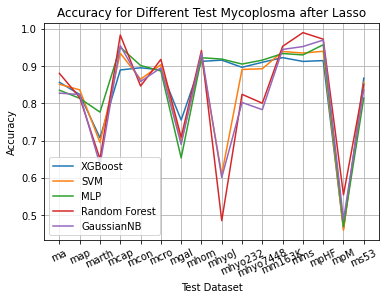

In [9]:
from matplotlib import pyplot as plt

x = ["ma", "map", "marth", "mcap", "mcon", "mcro", "mgal", "mhom", "mhyoJ", "mhyo232", "mhyo7448", "mm163K", "mms", "mpHF", "mpM", "ms53"]
plt.plot(x, scores_xgb_ac, label='XGBoost')
plt.plot(x, scores_svm_ac, label='SVM')
plt.plot(x, scores_mlp_ac, label='MLP')
plt.plot(x, scores_rf_ac, label='Random Forest')
plt.plot(x,scores_nb_ac,label = 'GaussianNB')

# 添加图例
plt.legend()

# 添加标题和轴标签
plt.title('Accuracy for Different Test Mycoplosma after Lasso')
plt.xlabel('Test Dataset')
plt.ylabel('Accuracy')
plt.xticks(rotation=25)
# 显示图形
plt.grid(True)
plt.savefig('../ACC_Lasso.jpg')
plt.show()